In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df = pd.read_excel('dataset_linear_regression.xlsx')

In [12]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [46]:
def plot_data(m, b, data):
    # Plot the data points as a scatter plot
    plt.scatter(data.Hours, data.Scores)

    # Plot the line defined by y = m * x + b
    min = int(data.Hours.min())
    max = int(data.Hours.max())+2
    plt.plot(list(range(min, max)), [m * x + b for x in range(min, max)], color='red')

    # Set the labels for the x and y axes
    plt.xlabel('Hours Studied')
    plt.ylabel('Scores')

    # Set the title for the plot
    plt.title('Student Study Record')

    # Display the plot
    plt.show()

In [18]:
def predicted_value(w, b, x):
    
    return ( w * x ) + b

In [31]:

def loss_function(w, b, df):

    error = 0

    for i in range(len(df)):

        error += ( predicted_value(w, b, df.iloc[i].Hours) - df.iloc[i].Scores ) ** 2

    error /= (2 * len(df))

    return error



In [40]:

def gradient_descent( w, b, df, lr ):

    b_grad = 0 # 0o
    w_grad = 0 # 01

    for i in range(len(df)) :

        b_grad += ( predicted_value(w, b, df.iloc[i].Hours) - df.iloc[i].Scores )
        w_grad += ( predicted_value(w, b, df.iloc[i].Hours) - df.iloc[i].Scores ) * df.iloc[i].Hours

    
    b_grad /= len(df)
    w_grad /= len(df)

    w = w - lr * w_grad
    b = b - lr * b_grad

    return w, b


Error: 2917.5063330157195


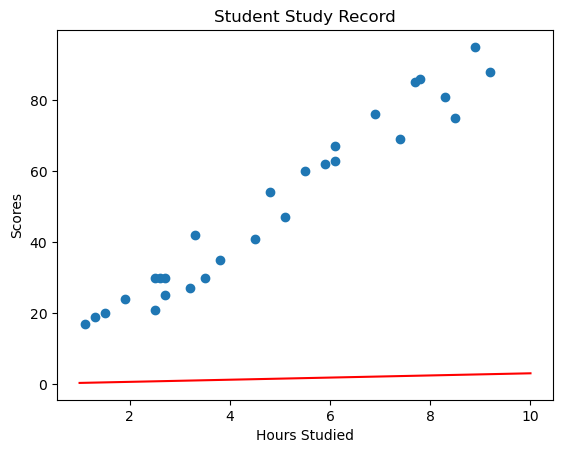

Error: 159.855468243099


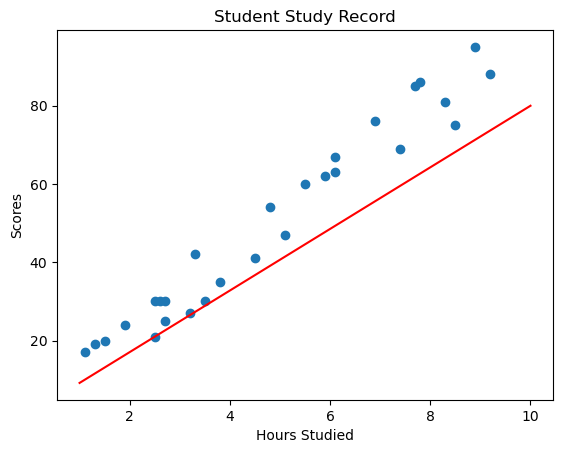

Error: 32.981691757688125


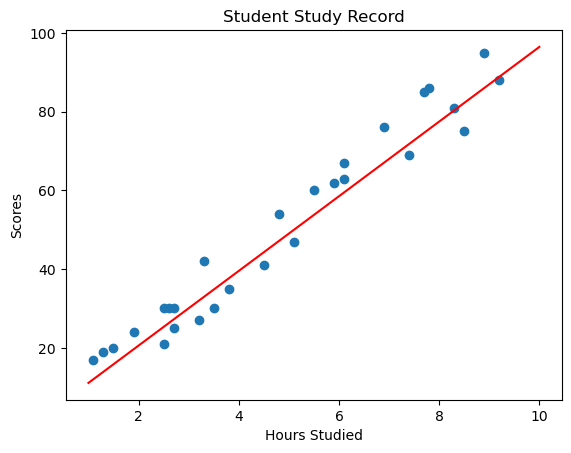

Error: 27.135496138256155


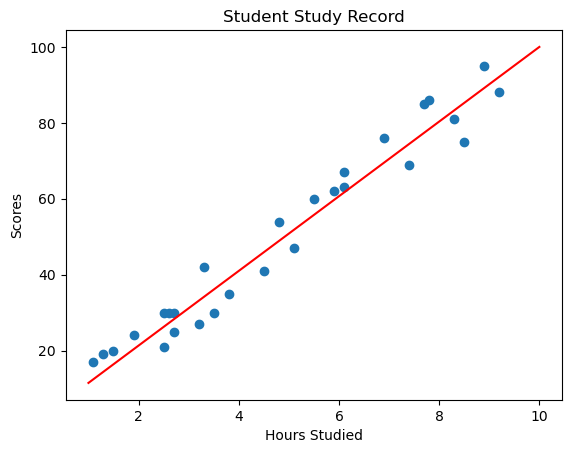

Error: 26.857295092447806


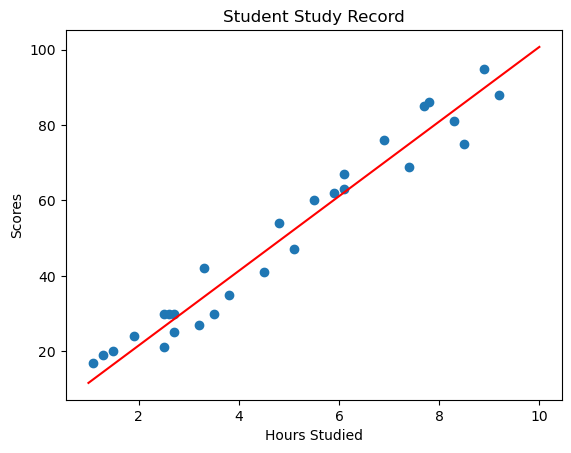

Error: 26.835432932590617


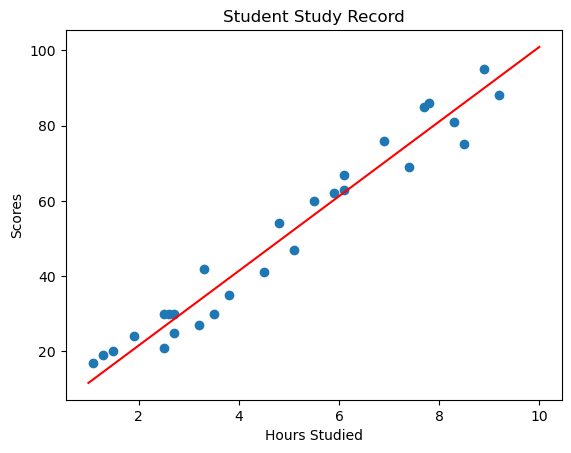

Error: 26.825546234148685


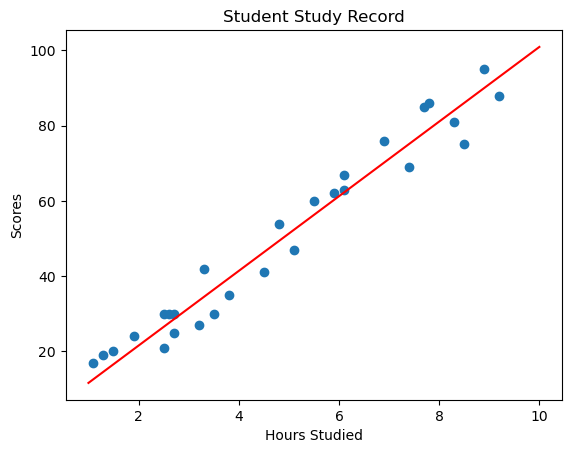

Error: 26.816389514042946


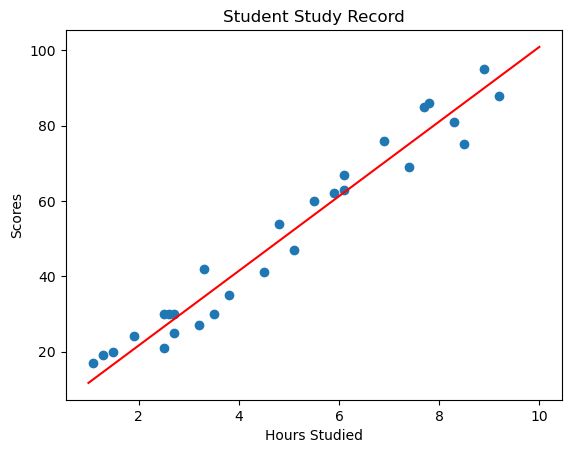

Error: 26.807441820273258


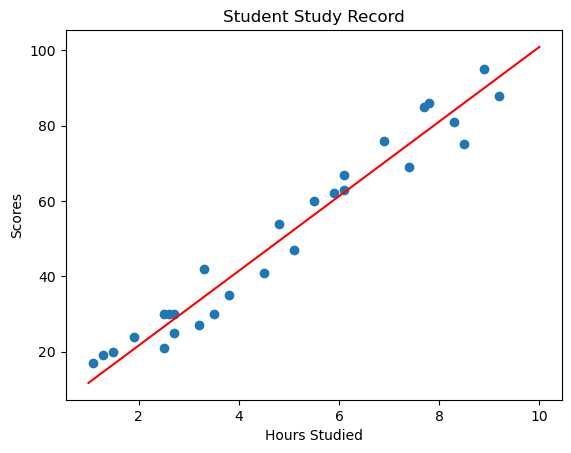

Error: 26.79867564950647


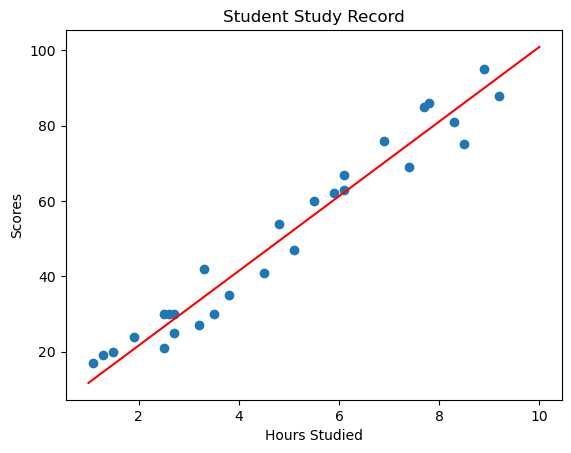

w = 9.910244890313214, b = 1.7888079255625757


In [48]:
w = 0
b = 0
epochs = 500
lr = 0.001
error = 0

for i in range(epochs):

    w, b = gradient_descent(w, b, df, lr)

    if i % 50 == 0:
        error = loss_function(w, b, df)
        print("Error:", error)
        plot_data(w, b, df)
        plt.show()

print(f'w = {w}, b = {b}')


## Sir's Method

In [36]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    totalError = 0

    # Loop through all the points in the dataset
    for i in range(0, len(points)):
        # Get the x and y values of the current point
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores

        # Calculate the error for this point and add it to the total error
        totalError += (y - (m * x + c)) ** 2

    # Return the average error for all points
    return totalError / float(len(points))

In [37]:
def gradien_descent(m_now, b_now, points, L):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0

    # Get the number of points in the dataset
    n = len(points)

    # Loop through all the points in the dataset
    for i in range(n):
        # Get the x and y values of the current point
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores

        # Calculate the partial derivatives of the loss function with respect to m and b
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))

    # Update m and b using gradient descent
    m = m_now - (L * m_gradient)
    b = b_now - (L * b_gradient)

    # Return the updated values of m and b
    return m, b

In [39]:
# Initialize the values of m and b to 0
m = 0
b = 0

# Set the learning rate and number of epochs for gradient descent
lr = 0.0001
epochs = 500

# Perform gradient descent for the specified number of epochs
for i in range(epochs):
    # Update m and b using gradient descent
    m, b = gradien_descent(m, b, df, lr)

    # Every 50 epochs, plot the df and the current line being fit to the df
    if i % 50 == 0:
        # Print the current epoch number and the error for this epoch
        print("Epoch {0} - Error: {1}".format(i, loss_function(m, b, df)))
        # plot_data(m, b, data)
        # plt.show()
        # input('Press enter to continue...')

# Print the final values of m and b
print("m = {0}, b = {1}".format(m, b))

Epoch 0 - Error: 3063.9347690104246
Epoch 50 - Error: 1679.9303504774432
Epoch 100 - Error: 926.624260893368
Epoch 150 - Error: 516.6034224881565
Epoch 200 - Error: 293.4306528918572
Epoch 250 - Error: 171.95814943751455
Epoch 300 - Error: 105.8404833065645
Epoch 350 - Error: 69.85212071312351
Epoch 400 - Error: 50.2629577111285
Epoch 450 - Error: 39.59978258803762
m = 9.455393894187338, b = 1.5906577550785024


In [82]:
df = pd.read_excel('price-prediction.xlsx')

In [83]:
df.head()

,PLOTS,PRICE
0,120,550000
1,145,645000
2,160,700000
3,110,475000
4,180,825000


In [89]:
def predicted_value(w, b, x):

    return (w * x) + b

In [84]:

def plot_data(w, b, df):
    
    plt.scatter(df.PLOTS, df.PRICE)

    min = int( df.PLOTS.min() )
    max = int( df.PLOTS.max() )

    plt.plot( list(range(min, max)), [ predicted_value(w, b, x) for x in range(min, max) ], color='red' )

    plt.show()


In [78]:

def loss_function(w, b, df):

    error = 0

    for i in range(len(df)):

        error += ( predicted_value(w,b,df.iloc[i].PLOTS) - df.iloc[i].PRICE ) ** 2

    error /= ( 2 * len(df))

    return error


In [102]:

def gradient_descent3(w, b, df, lr):

    w_grad = 0
    b_grad = 0

    for i in range(len(df)):

        b_grad += ( predicted_value(w,b,df.iloc[i].PLOTS) - df.iloc[i].PRICE )
        w_grad += ( predicted_value(w,b,df.iloc[i].PLOTS) - df.iloc[i].PRICE ) * df.iloc[i].PLOTS

    b_grad /= len(df)
    w_grad /= len(df)

    w = w - lr * w_grad
    b = b - lr * b_grad

    return w, b


In [100]:
def gradient_descent2(m_now, b_now, points, L):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0

    # Get the number of points in the dataset
    n = len(points)

    # Loop through all the points in the dataset
    for i in range(n):
        # Get the x and y values of the current point
        x = points.iloc[i].PLOTS
        y = points.iloc[i].PRICE

        # Calculate the partial derivatives of the loss function with respect to m and b
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))

    # Update m and b using gradient descent
    m = m_now - (L * m_gradient)
    b = b_now - (L * b_gradient)

    # Return the updated values of m and b
    return m, b

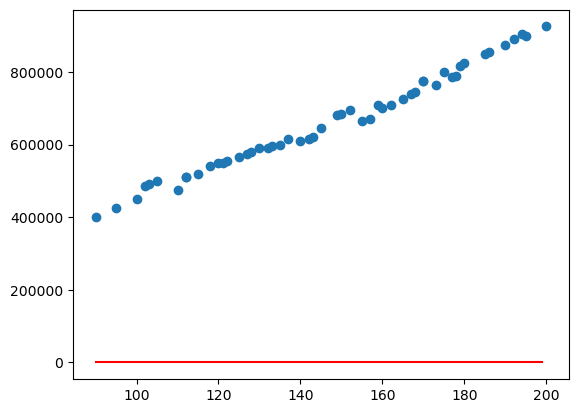

In [85]:
plot_data(0, 0, df)

Error: 218285754756.23776


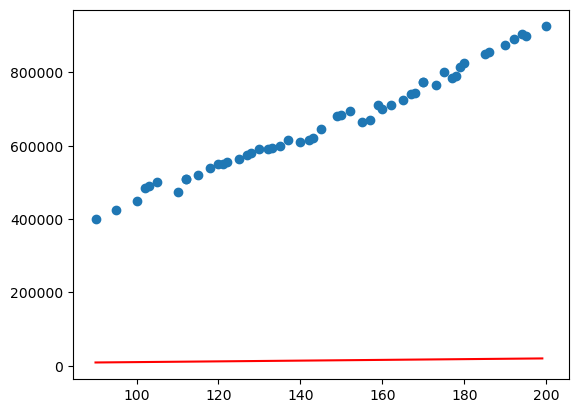

Error: 22714243462.670654


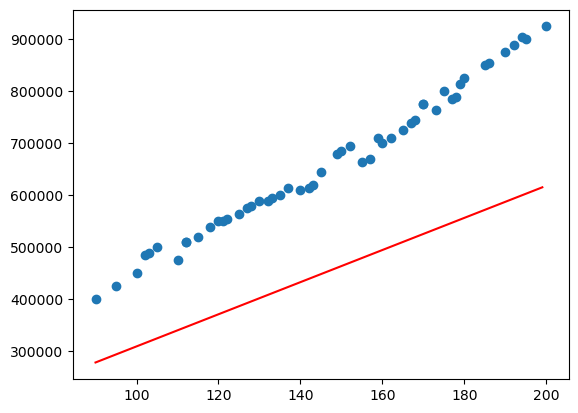

Error: 2467573005.492682


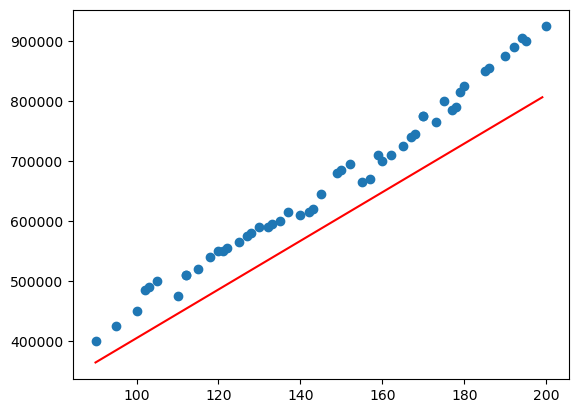

Error: 371523010.96183974


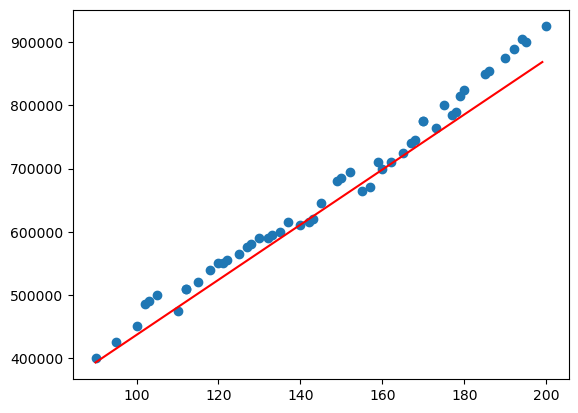

Error: 154528041.42029622


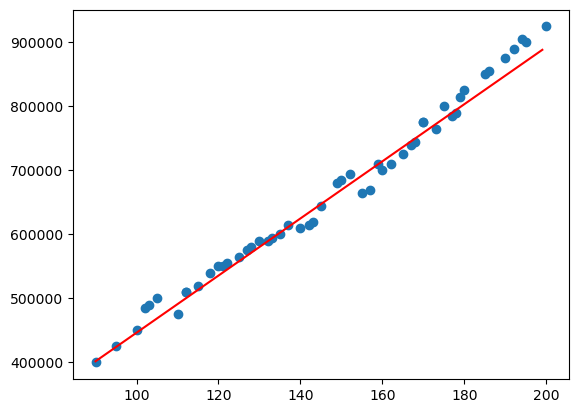

Error: 132063489.95475982


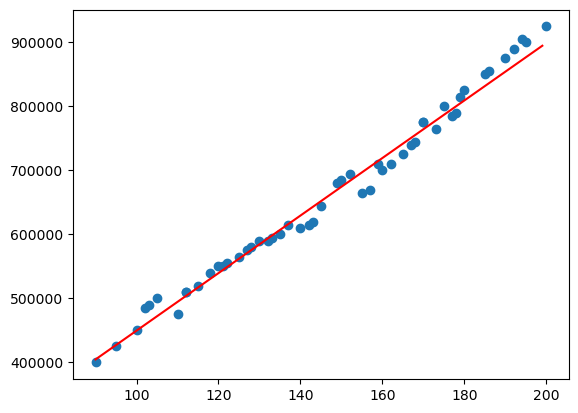

Error: 129737829.07709636


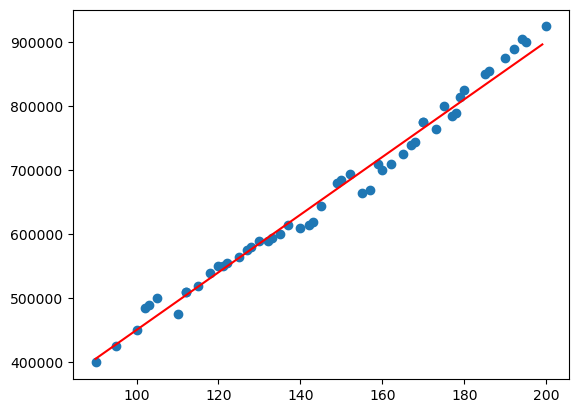

Error: 129497060.20821926


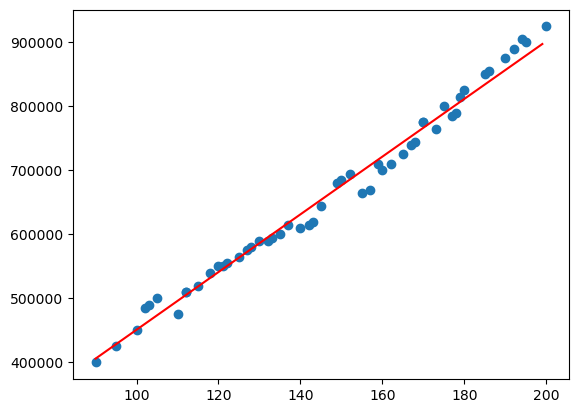

Error: 129472131.16773666


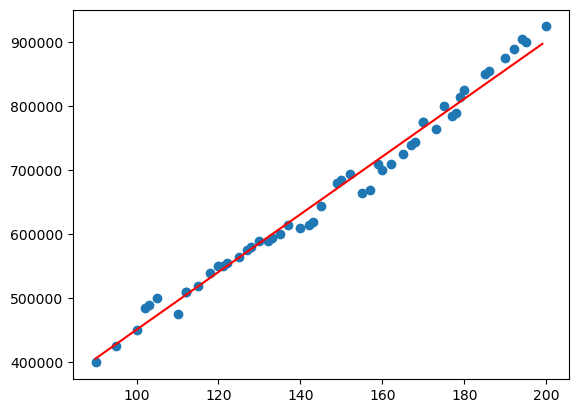

Error: 129469547.08869539


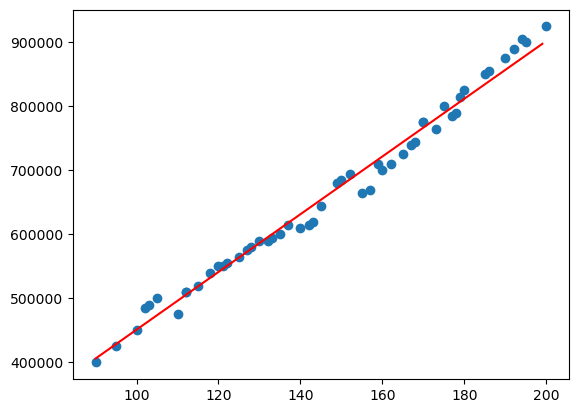

In [103]:
w, b = 0, 0
epochs = 500
lr = 0.000001

for i in range(epochs):

    w, b = gradient_descent3(w, b, df, lr)

    if i % 50 == 0:
        print (f'Error: {loss_function(w, b, df)}')
        plot_data(w, b, df)


